In [2]:
import librosa
import numpy as np

In [33]:
y, sr = librosa.load("data/DevilInANewDress.mp3")

hop_length = int(sr * 0.25)

mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=hop_length)
rms = librosa.feature.rms(y=y, hop_length=hop_length)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)

features = np.vstack([mfcc, rms, centroid]).T


In [28]:
import matplotlib.pyplot as plt

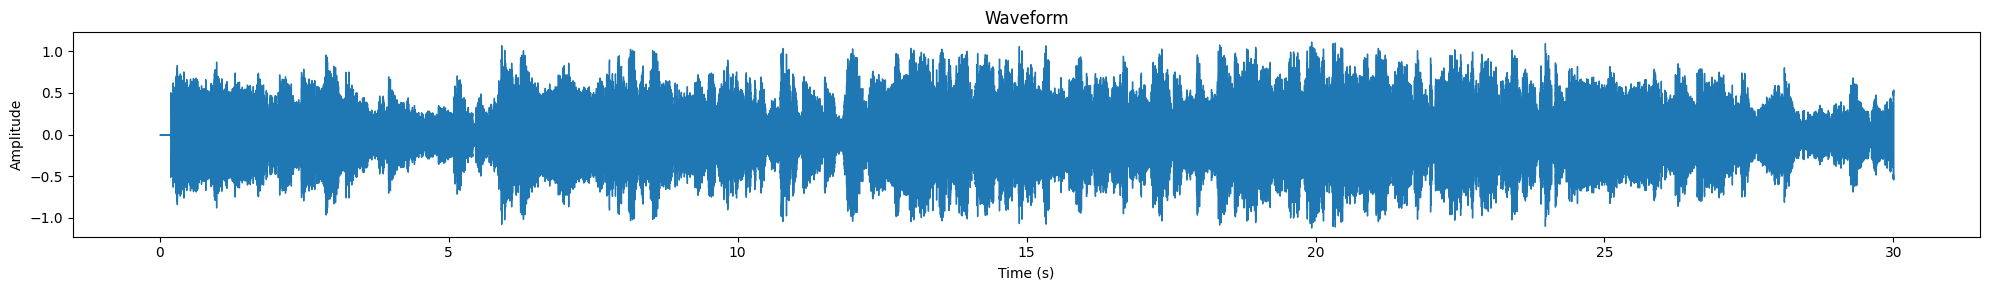

In [34]:
plt.figure(figsize=(20, 3))
librosa.display.waveshow(y[:int(sr * 30)], sr=sr) #To get the first 30 seconds only
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

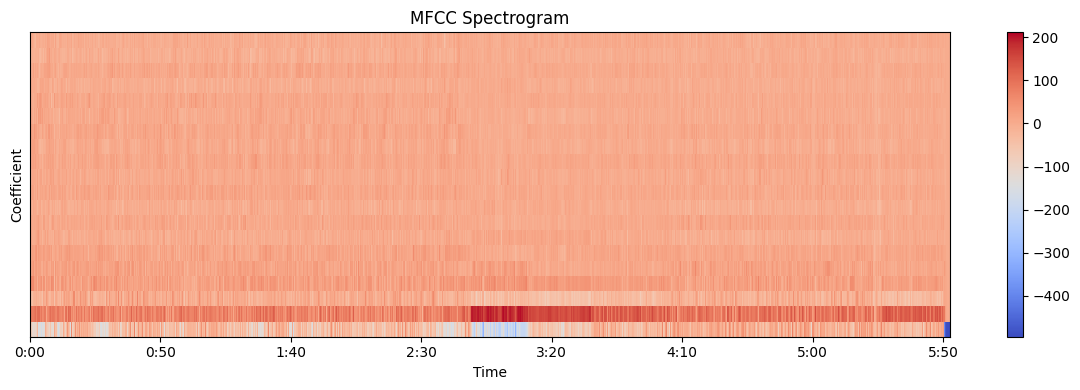

In [35]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title("MFCC Spectrogram")
plt.ylabel("Coefficient")
plt.tight_layout()
plt.show()


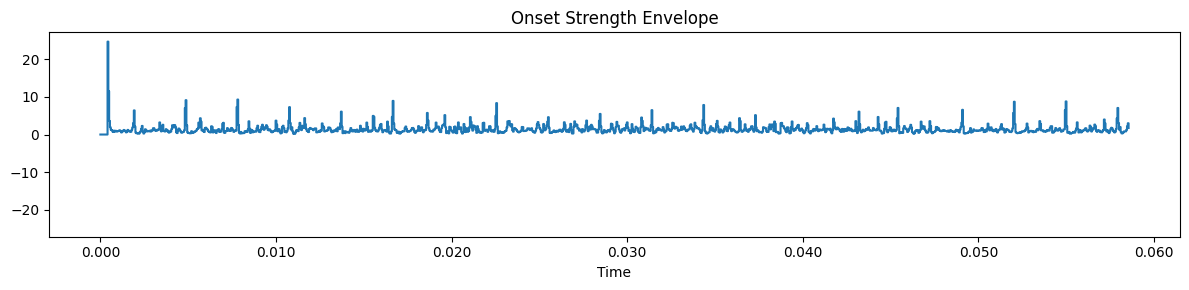

In [36]:
onset_env = librosa.onset.onset_strength(y=y[:int(sr * 30)], sr=sr)

plt.figure(figsize=(12, 3))
librosa.display.waveshow(onset_env, sr=sr)
plt.title("Onset Strength Envelope")
plt.tight_layout()
plt.show()


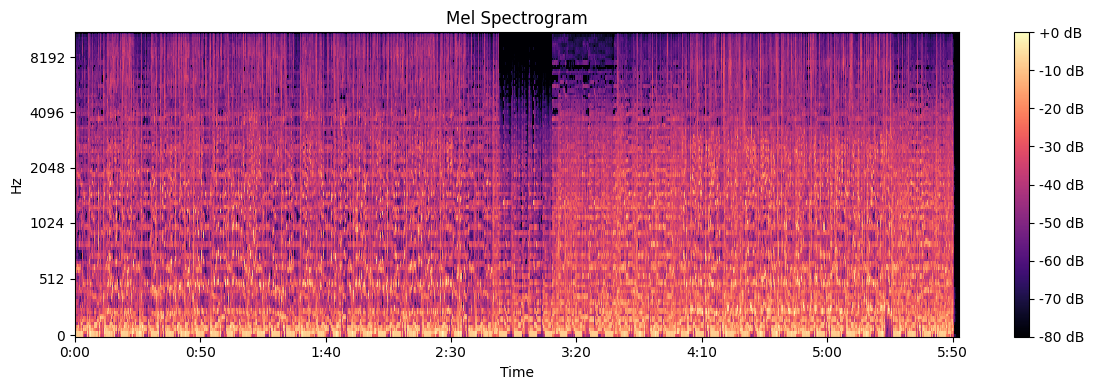

In [24]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()
